In [1]:
# packages 
import pyswat as ps 
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt 
import contextily as ctx
import numpy as np 
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [2]:
hsv_modified = cm.get_cmap('Blues', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
newcmp = ListedColormap(hsv_modified(np.linspace(0.3, 1.0, 256)))

In [3]:
fpath = "/scratch/smj5vup/omoScenarios/BestPolicyEachObj/DPS/"
Objectives = ['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton'] 
folders = ['TxtInOut_0', 'TxtInOut_1', 'TxtInOut_2','TxtInOut_3','TxtInOut_4']

omo = gpd.read_file('shapefile/subs1.shp')
omo_df = pd.read_csv('data/omo.csv')
for col in omo_df.columns[22:]:
    omo[col] = omo_df[col]
omo.to_crs(epsg=3857, inplace=True)

riv = gpd.read_file('shapefile/riv1.shp')
riv_df = pd.read_csv('data/riv.csv')
for col in riv_df.columns[19:]:
    riv[col] = riv_df[col]
riv.to_crs(epsg=3857, inplace=True)

res =  gpd.read_file('shapefile/monitoring_points1.shp')
res.to_crs(epsg=3857, inplace=True)
res = res[(res.POINTID == 10) | (res.POINTID == 13) | (res.POINTID == 17)]
res.reset_index(inplace=True)
res_df = pd.read_csv('data/res.csv')
for col in res_df.columns[16:]:
    res[col] = res_df[col]


In [4]:
omo_outline = omo.dissolve()

In [52]:
cmp_sm = ListedColormap(hsv_modified(np.linspace(0, 0.35, 256)))

In [23]:
import warnings
warnings.filterwarnings('ignore', message='.*This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.*')


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


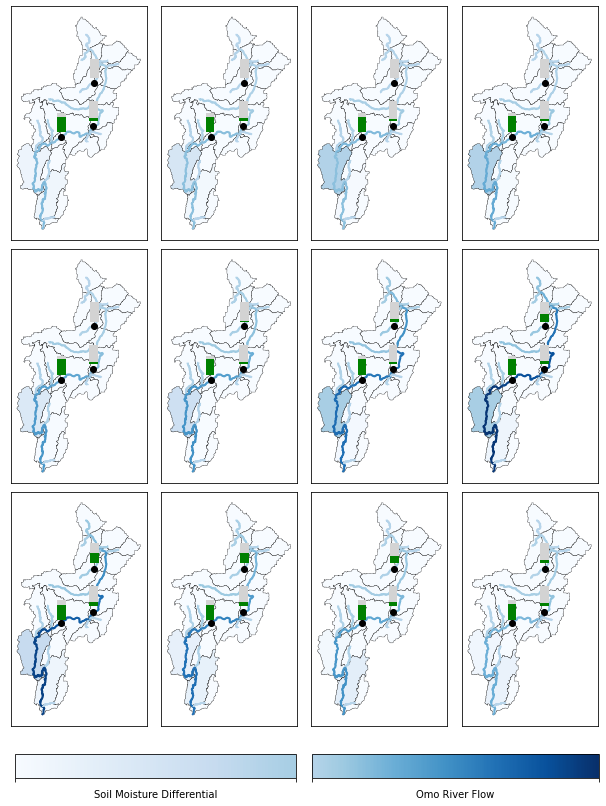

In [55]:
fig, ax = plt.subplots(3,4)
months = ['Jan', 'Feb', 'Mar', 
         'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep',
         'Oct', 'Nov', 'Dec']
g1_xs = [0.153, 0.398, 0.643, 0.888]
g1_ys = [0.863, 0.556, 0.251]

g3_xs = [0.151, 0.396, 0.641, 0.888]
g3_ys = [0.809, 0.502, 0.197]

k_xs = [0.099, 0.341, 0.59, 0.835]
k_ys = [0.795, 0.488, 0.179]

for mo in range(1,13):
    k = mo - 1
    p = k % 4
    if mo < 5:
        i = 0 
    elif mo < 9:
        i = 1
    else:
        i = 2
    
    print(i,p)
 
    o = omo.plot(column= "Sugar_diff_%s" % str(mo),
        ax=ax[i,p],
        cmap = cmp_sm, # "Blues",
        vmin = 0,
        vmax = 7, 
        edgecolor="k", 
        lw = 0.25)

    r = riv.plot(column = "Sugar_%s" % str(mo), 
        ax = ax[i,p],
        cmap = newcmp, 
        lw = 2,
        vmin = 0,
        vmax = 1200)

    g = res.plot(ax=ax[i,p], 
                color='k',
                zorder = 10)
    
        
    fig.set_size_inches(8.5, 11)
    # ax[i,k].set_title("month = %s" % mo)
    ax[i,p].axes.xaxis.set_visible(False)
    ax[i,p].axes.yaxis.set_visible(False)
    
    #ax[i,p].set_facecolor('lightgrey')

    ymin, ymax = ax[i,p].get_ylim()
    xmin, xmax = ax[i,p].get_xlim()
    
    # ax[i,p].set_title(months[k], loc='left')
        
    ax_gi = fig.add_axes([g1_xs[p], g1_ys[i], 0.015, 0.025])
    val = (res['Sugar_%s' % str(mo)][0] - 17437 * 10**4) / (80213 * 10**4 - 17437 * 10**4) 
    ax_gi.bar([1], val, color='green', width= 0.1)
    ax_gi.bar([1], 1-val, width=0.1, bottom=val, color='lightgrey')
    ax_gi.set_axis_off()
    ax_gi.set_ylim(0,1)
#     ax_gi.pie([val, 1-val], colors=['green', 'lightgrey'], radius = 0.7)
    
    
    # gibe iii
    ax_giii = fig.add_axes([g3_xs[p], g3_ys[i], 0.015, 0.025])
    val = (res['Sugar_%s' % str(mo)][1] - 292120.0 * 10**4) / (1470000.0 * 10**4 - 292120.0 * 10**4) 
    # ax_giii.pie([val, 1-val], colors=['green', 'lightgrey'], radius = 0.7)
    ax_giii.bar([1], val, color='green', width= 0.1)
    ax_giii.bar([1], 1-val, width=0.1, bottom=val, color='lightgrey')
    ax_giii.set_ylim(0,1)
    ax_giii.set_axis_off()
    
    
        
    # koysha
    ax_k = fig.add_axes([k_xs[p], k_ys[i], 0.015, 0.025])
    val = (res['Sugar_%s' % str(mo)][2] - 76000.0 * 10**4) / (570000.0 * 10**4 - 76000.0 * 10**4) 
    # ax_k.pie([val, 1-val], colors=['green', 'lightgrey'], radius = 0.7)
    ax_k.bar([1], val, color='green', width= 0.1)
    ax_k.bar([1], 1-val, width=0.1, bottom=val, color='lightgrey')
    ax_k.set_ylim(0,1)
    ax_k.set_axis_off()
    

#     ax_giii = fig.add_axes([0.547, 0.5, 0.05, 0.05])
#     ax_giii.bar([1], [rsv[1]], color=['C2'], width = 0.4)
#     ax_giii.set_axis_off()
#     ax_giii.set_ylim(292120.0 * 10**4, 1470000.0 * 10**4)

#     ax_k = fig.add_axes([0.447, 0.465, 0.05, 0.05])
#     ax_k.bar([1], [rsv[2]], color=['C2'], width = 0.4)
#     ax_k.set_axis_off()
#     ax_k.set_ylim(76000.0 * 10**4, 570000.0 * 10**4)

    if len(str(mo)) < 2:
        str_mo = "0" + str(mo)
    else:
        str_mo = str(mo)
        
        
                
    plt.tight_layout()
    
# colorbar 
sm = plt.cm.ScalarMappable(cmap=cmp_sm)
sm.set_array([0,1])
cbar_ax = fig.add_axes([0.03, -0.02, 0.46, 0.03])
cbar = fig.colorbar(sm, ax=ax, cax = cbar_ax, orientation='horizontal', ticks=np.arange(0.0,2,1))
cbar.ax.set_xticklabels([],fontsize=14)
cbar.set_label('Soil Moisture Differential')

sm = plt.cm.ScalarMappable(cmap=newcmp)
sm.set_array([0,1])
cbar_ax = fig.add_axes([0.515, -0.02, 0.47, 0.03])
cbar = fig.colorbar(sm, ax=ax, cax = cbar_ax, orientation='horizontal', ticks=np.arange(0.0,2,1))
cbar.ax.set_xticklabels([],fontsize=14)
cbar.set_label('Omo River Flow')

plt.savefig('/scratch/smj5vup/omoScenarios/BestPolicyEachObjCC/MakeFigures/Figures/08_SpatialPlot.svg')
